# QUESTION 1

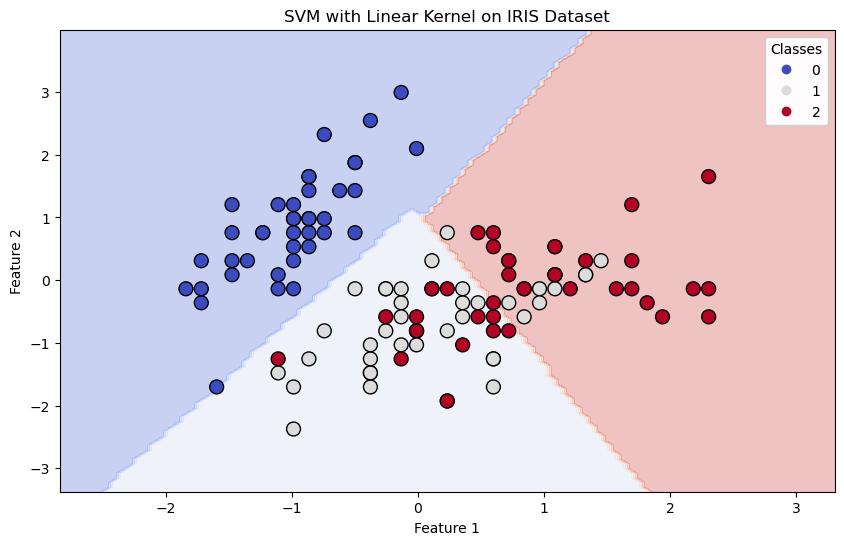

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Create a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

# Predict the labels for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', s=100)
plt.title('SVM with Linear Kernel on IRIS Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.show()


# QUESTION 2

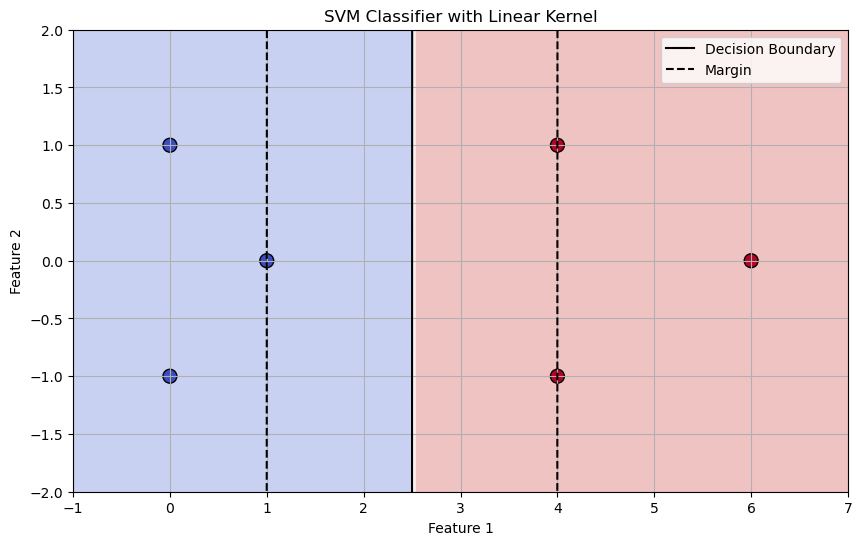

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the data points
X = np.array([[4, 1], [4, -1], [6, 0],  # Positively labeled points (class 1)
              [1, 0], [0, 1], [0, -1]])  # Negatively labeled points (class -1)
y = np.array([1, 1, 1, -1, -1, -1])  # Labels: 1 for positive, -1 for negative

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the labels for each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', s=100)
plt.title('SVM Classifier with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
# Get the weight and bias from the classifier
w = clf.coef_[0]
b = clf.intercept_[0]

# Create the decision boundary line
x_decision = np.linspace(x_min, x_max)
y_decision = -(w[0] * x_decision + b) / w[1]

# Plot the decision boundary
plt.plot(x_decision, y_decision, 'k-', label='Decision Boundary')

# Plot the margins
margin = 1 / np.sqrt(np.sum(w ** 2))
y_margin_pos = y_decision + margin * w[0] / w[1]
y_margin_neg = y_decision - margin * w[0] / w[1]

plt.plot(x_decision, y_margin_pos, 'k--', label='Margin')
plt.plot(x_decision, y_margin_neg, 'k--')

# Create a legend
plt.legend()

# Show the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.show()


# QUESTION 3

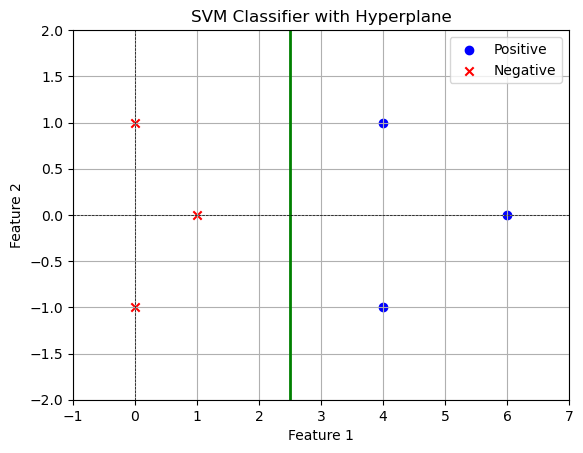

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the positively and negatively labeled data points
positives = np.array([[4, 1], [4, -1], [6, 0]])
negatives = np.array([[1, 0], [0, 1], [0, -1]])

# Combine the data for processing
X = np.vstack((positives, negatives))
y = np.array([1] * len(positives) + [-1] * len(negatives))

# Function to calculate the hyperplane parameters
def fit_svm(X, y):
    # Separate the data points based on their labels
    pos = X[y == 1]
    neg = X[y == -1]

    # Compute the means of each class
    mean_pos = np.mean(pos, axis=0)
    mean_neg = np.mean(neg, axis=0)

    # The normal vector of the hyperplane is perpendicular to the line connecting the means
    normal_vector = mean_pos - mean_neg

    # The hyperplane can be represented as: w1 * x1 + w2 * x2 + b = 0
    # To find b, we can use one of the means
    b = -0.5 * (np.dot(mean_pos, normal_vector) + np.dot(mean_neg, normal_vector))

    return normal_vector, b

# Fit the SVM
w, b = fit_svm(X, y)

# Function to plot the data and the hyperplane
def plot_svm(X, y, w, b):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Positive', marker='o')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Negative', marker='x')

    # Create a grid to plot the hyperplane
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = w[0] * xx + w[1] * yy + b
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.title('SVM Classifier with Hyperplane')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the SVM
plot_svm(X, y, w, b)


# QUESTION 4

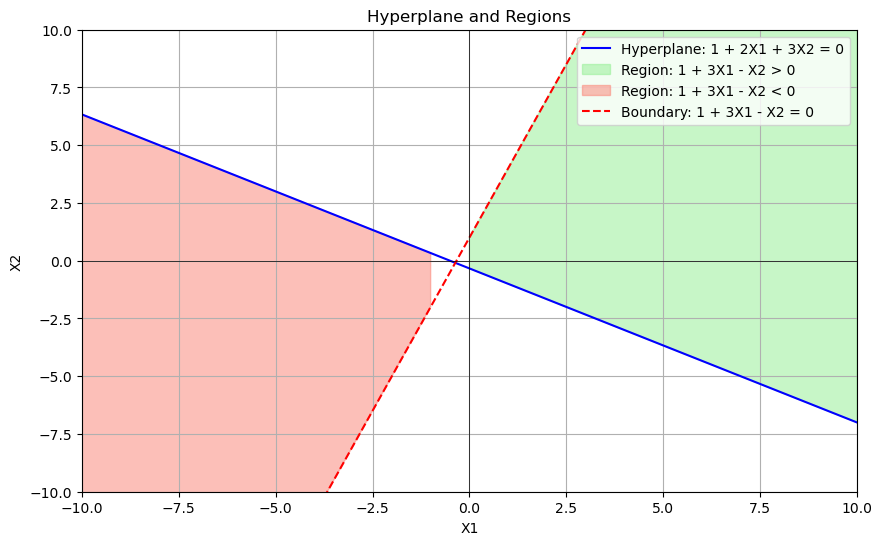

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the hyperplane and regions
def plot_hyperplane():
    # Define the range for x1 and x2
    x1 = np.arange(-10, 11, 1)
    
    # Hyperplane equation: 1 + 2x1 + 3x2 = 0 => x2 = -(1 + 2x1) / 3
    x2_hyperplane = -(1 + 2 * x1) / 3
    
    # Prepare the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the hyperplane
    plt.plot(x1, x2_hyperplane, label='Hyperplane: 1 + 2X1 + 3X2 = 0', color='blue')
    
    # Indicate regions
    # Region for 1 + 3X1 - X2 > 0 => X2 < 1 + 3X1
    x2_region1 = 1 + 3 * x1
    plt.fill_between(x1, x2_hyperplane, x2_region1, where=(x2_region1 > x2_hyperplane), 
                     color='lightgreen', alpha=0.5, label='Region: 1 + 3X1 - X2 > 0')

    # Region for 1 + 3X1 - X2 < 0 => X2 > 1 + 3X1
    plt.fill_between(x1, x2_hyperplane, x2_region1, where=(x2_region1 < x2_hyperplane), 
                     color='salmon', alpha=0.5, label='Region: 1 + 3X1 - X2 < 0')

    # Line for 1 + 3X1 - X2 = 0 => X2 = 1 + 3X1
    plt.plot(x1, x2_region1, label='Boundary: 1 + 3X1 - X2 = 0', color='red', linestyle='--')

    # Labels and limits
    plt.title('Hyperplane and Regions')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.grid()
    plt.legend()
    plt.show()

# Call the function to plot
plot_hyperplane()


# QUESTION 5

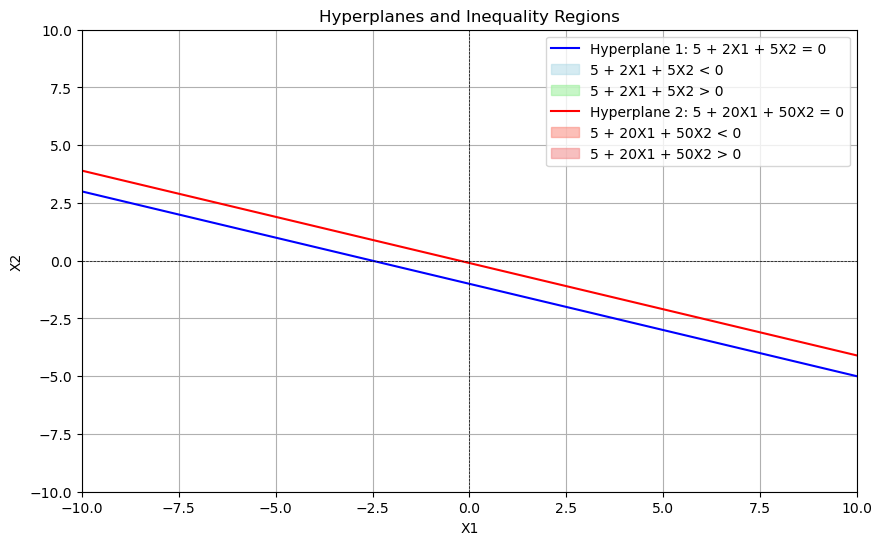

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplanes():
    x1 = np.linspace(-10, 10, 400)
    x2_hyperplane1 = (-5 - 2 * x1) / 5
    x2_hyperplane2 = (-5 - 20 * x1) / 50
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(x1, x2_hyperplane1, label='Hyperplane 1: 5 + 2X1 + 5X2 = 0', color='blue')
    
    plt.fill_between(x1, x2_hyperplane1, -10, where=(x2_hyperplane1 < -10), 
                     color='lightblue', alpha=0.5, label='5 + 2X1 + 5X2 < 0')
    
    plt.fill_between(x1, x2_hyperplane1, 10, where=(x2_hyperplane1 > 10), 
                     color='lightgreen', alpha=0.5, label='5 + 2X1 + 5X2 > 0')
    
    plt.plot(x1, x2_hyperplane2, label='Hyperplane 2: 5 + 20X1 + 50X2 = 0', color='red')
    
    plt.fill_between(x1, x2_hyperplane2, -10, where=(x2_hyperplane2 < -10), 
                     color='salmon', alpha=0.5, label='5 + 20X1 + 50X2 < 0')
    
    plt.fill_between(x1, x2_hyperplane2, 10, where=(x2_hyperplane2 > 10), 
                     color='lightcoral', alpha=0.5, label='5 + 20X1 + 50X2 > 0')
    
    plt.title('Hyperplanes and Inequality Regions')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

plot_hyperplanes()

